# Air quality in Bristol

## Question: Did air quality in Bristol change during lockdown?

This Python demonstration will look at a few gases related to air quality which are measured in and around Bristol, United Kingdom. The map below shows some of the locations of instruments which have been continuously measuring gases such as nitrogen monoxide, $NO$, and nitrogen dioxide, $NO_2$, in the air (these and other gases are collectively called $NO_x$). We have marked the location for the data we will be looking at as a black "x". This is from the monitoring instruments near the centre of Bristol on a road called Temple Way.

See here for the [Air Quality Dashboard](https://opendata.bristol.gov.uk/pages/air-quality-dashboard-new/map#map)

![Bristol map of continuous air quality monitoring](Bristol_AirQuality_Map.png)

## Get started

**To start: Press the &#9193; button above (fast-forward symbol) and then select the red "Restart and Run All Cells" option**

This will run all the code below.

### Reading the data

The code we are writing today is Python and the tool you are using is called a Jupyter notebook. This allows us to run Python code and to immediately see the results.

We are going to be using a [library called `pandas`](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html) which allows us to easily read and plot data. Below we read in our data file which has been downloaded from the [Open Data Bristol Archive](https://opendata.bristol.gov.uk/explore/dataset/air-quality-data-continuous/information/?disjunctive.location).

In [1]:
import pandas as pd

data_filename = "air-quality-bristol-temple-way.csv"

data = pd.read_csv(data_filename, parse_dates=True)

In [2]:
data

,NOx,NO,NO2
2017-04-01 01:00:00,5.86245,0.21703,5.52967
2017-04-01 02:00:00,5.69543,0.48769,4.94764
2017-04-01 03:00:00,2.99784,0.42284,2.34951
2017-04-01 04:00:00,13.19003,2.47215,9.39946
2017-04-01 05:00:00,16.78793,2.01657,13.69589
...,...,...,...
2021-02-22 08:00:00,187.04200,66.98000,84.34100
2021-02-22 09:00:00,126.03400,32.43000,76.30900
2021-02-22 10:00:00,82.04600,13.22100,61.77400
2021-02-22 11:00:00,58.52300,8.23200,45.90000


We have created a variable called `data` which contains a table of information that we have extracted from a file.

This contains the date and time that each measurement was taken at the Temple Way site, along with the measurement values for nitrogen monoxide, $NO$, nitrogen dioxide, $NO_2$ and the combination as $NO_x$. All measurements are in units of $\mu g m^{-3}$ (micrograms per meter cubed).

---

### Selecting dates

If we look at the table above we can see this starts in 2017 and ends in 2021. If we want to extract data for just one year we can write:

In [3]:
data.loc["2017"]

,NOx,NO,NO2
2017-04-01 01:00:00,5.86245,0.21703,5.52967
2017-04-01 02:00:00,5.69543,0.48769,4.94764
2017-04-01 03:00:00,2.99784,0.42284,2.34951
2017-04-01 04:00:00,13.19003,2.47215,9.39946
2017-04-01 05:00:00,16.78793,2.01657,13.69589
...,...,...,...
2017-12-31 19:00:00,22.83235,3.06604,18.13115
2017-12-31 20:00:00,22.05271,2.74518,17.84350
2017-12-31 21:00:00,22.38684,3.42256,17.13899
2017-12-31 22:00:00,18.87846,2.35301,15.27056


**Question (1): How do you think you could extract the data for 2018?**

*Add some text to the cell below and press the &#9205; Run button (play symbol). To run all the cells again in order press the &#9193; button (fast-forward symbol) and then select the red "Restart and Run All Cells" option.*

In [4]:
## SUGGESTED SOLUTION
data.loc["2018"]

,NOx,NO,NO2
2018-01-01 00:00:00,28.22000,2.80000,23.92000
2018-01-01 01:00:00,28.21501,2.79977,23.92208
2018-01-01 02:00:00,16.69265,2.18288,13.34562
2018-01-01 03:00:00,24.54041,2.24219,21.10243
2018-01-01 04:00:00,20.05334,2.45573,16.28793
...,...,...,...
2018-12-31 19:00:00,35.38411,5.08275,27.59068
2018-12-31 20:00:00,34.32500,3.86663,28.39625
2018-12-31 21:00:00,36.25066,4.17846,29.84379
2018-12-31 22:00:00,36.73208,4.73974,29.46458


---

### Statistical properties

We're going to save out the results both 2019 and 2020 to two separate names for easier access:

In [5]:
data_2019 = data.loc["2019"]
data_2020 = data.loc["2020"]

If we look at `data_2019` we can see that this contains all of our data related to 2019:

In [6]:
data_2019

,NOx,NO,NO2
2019-01-01 00:00:00,20.6638,1.6550,18.1262
2019-01-01 01:00:00,22.1193,2.5756,18.1701
2019-01-01 02:00:00,27.0133,3.3514,21.8746
2019-01-01 03:00:00,27.0613,3.5065,21.6847
2019-01-01 04:00:00,23.6547,2.3273,20.0861
...,...,...,...
2019-12-31 19:00:00,199.5325,81.2340,74.9755
2019-12-31 20:00:00,56.0454,13.7633,34.9419
2019-12-31 21:00:00,85.3762,28.0465,42.3722
2019-12-31 22:00:00,65.1338,17.7699,37.8869




We can look at the average (mean) for all the columns by writing:

In [7]:
data_2019.mean()

NOx    84.693537
NO     29.640950
NO2    39.249053
dtype: float64

**Question (2): How could we find the average (mean) for the 2020 data?**

*Add some text to the cell below and press the &#9205; Run button (play symbol). To run all the cells again in order press the &#9193; button (fast-forward symbol) and then select the red "Restart and Run All Cells" option.*

In [8]:
## SUGGESTED SOLUTION
data_2020.mean()

NOx    57.511950
NO     19.106533
NO2    28.215673
dtype: float64

*Is the average higher or lower in 2020 compared to 2019 for the three gas measurements?*

**Answer:** The average is higher in 2019 than 2020 for each of the three gas measurements.

---

### Creating plots

We can also plot all of the measurements within `data` using:

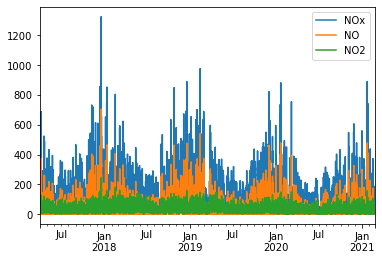

In [9]:
data.plot()

*There's lots of spikes but what does the overall trend look like? What year do we see the highest peaks?*

We could smooth over the data by applying a rolling average over a time period. This means that we look at the average of all the values around each time point within a given time window.

In this case we can find the rolling average for `data` using a window of 365 days ("365D") i.e. a year and save this to a new name called `data_rolling_average`.

In [10]:
data_rolling_average = data.rolling("365D").mean()
data_rolling_average

,NOx,NO,NO2
2017-04-01 01:00:00,5.862450,0.217030,5.529670
2017-04-01 02:00:00,5.778940,0.352360,5.238655
2017-04-01 03:00:00,4.851907,0.375853,4.275607
2017-04-01 04:00:00,6.936438,0.899927,5.556570
2017-04-01 05:00:00,8.906736,1.123256,7.184434
...,...,...,...
2021-02-22 08:00:00,57.197562,19.120009,28.048168
2021-02-22 09:00:00,57.210922,19.123427,28.056261
2021-02-22 10:00:00,57.218816,19.124566,28.062392
2021-02-22 11:00:00,57.223741,19.125057,28.066556


`data_rolling_average`, like `data`, is a table containing these measurements but this now contains the average values over each 365 day window.

**Question (3): How could we plot this new rolling average?**

*Add some text to the cell below and press the &#9205; Run button (play symbol). To run all the cells again in order press the &#9193; button (fast-forward symbol) and then select the red "Restart and Run All Cells" option.*

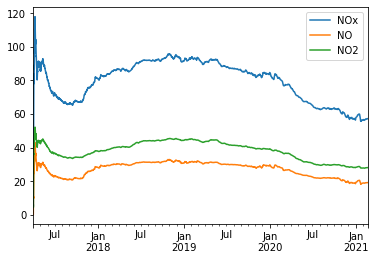

In [11]:
## SUGGESTED SOLUTION
data_rolling_average.plot()

*Do the measured values in 2020 look lower than 2019 (or earlier years)?*

**Answer:** Overall, these smoothed values in 2020 look lower than earlier years. This is most clear for $\mathrm{NO_{x}}$ but can also be seen for the individual gases of $\mathrm{NO}$ and $\mathrm{NO_{2}}$ as well.

---

**Additional analysis:** Can you think of any additional analysis you could try for these measurements?